<a href="https://colab.research.google.com/github/piyal-nagda/FMML_PROJECTS_AND_ASSIGNMENTS_PRIYAL/blob/main/FMML_M4L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

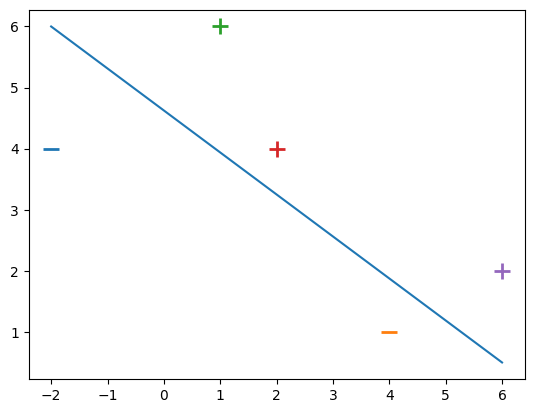

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

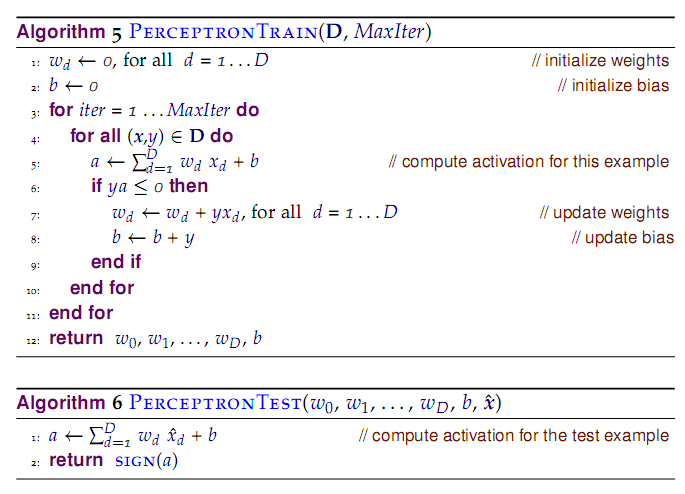

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

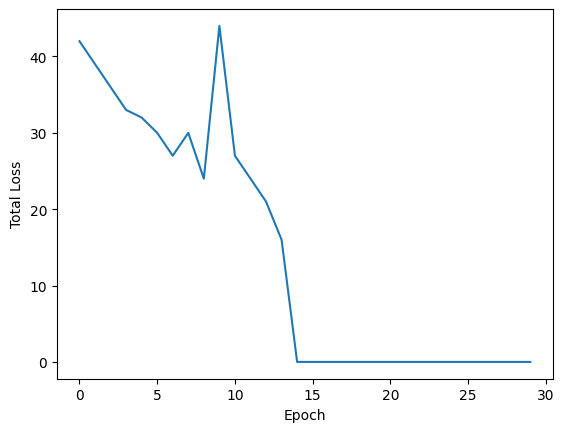

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

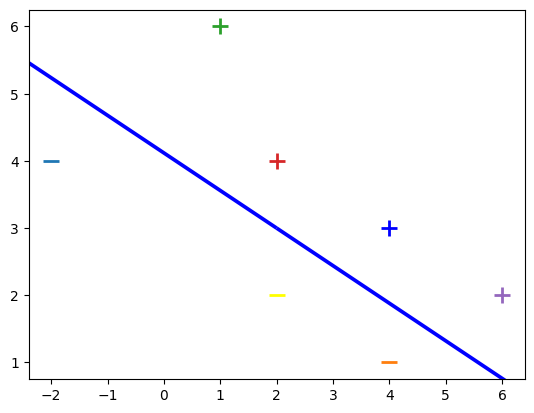

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [17]:
!pip install ucimlrepo


In [18]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt -O banknote_data.csv


--2024-11-15 08:39:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘banknote_data.csv’

banknote_data.csv       [ <=>                ]  45.31K  --.-KB/s    in 0.1s    

2024-11-15 08:39:37 (447 KB/s) - ‘banknote_data.csv’ saved [46400]



In [20]:
import sys
sys.path.append('/path/to/ucimlrepo')


In [22]:
import pandas as pd

# Load dataset
column_names = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]
data = pd.read_csv("banknote_data.csv", header=None, names=column_names)

# Split into features and targets
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Targets
print(X.head())
print(y.head())

# Check for missing values
print(X.isnull().sum())

# Summary statistics
print(X.describe())
# Convert targets to numeric values if they are not already
y = y.apply(lambda x: 1 if x == 'positive_class_label' else -1)  # Replace 'positive_class_label' accordingly


   Variance  Skewness  Curtosis  Entropy
0   3.62160    8.6661   -2.8073 -0.44699
1   4.54590    8.1674   -2.4586 -1.46210
2   3.86600   -2.6383    1.9242  0.10645
3   3.45660    9.5228   -4.0112 -3.59440
4   0.32924   -4.4552    4.5718 -0.98880
0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64
Variance    0
Skewness    0
Curtosis    0
Entropy     0
dtype: int64
          Variance     Skewness     Curtosis      Entropy
count  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657
std       2.842763     5.869047     4.310030     2.101013
min      -7.042100   -13.773100    -5.286100    -8.548200
25%      -1.773000    -1.708200    -1.574975    -2.413450
50%       0.496180     2.319650     0.616630    -0.586650
75%       2.821475     6.814625     3.179250     0.394810
max       6.824800    12.951600    17.927400     2.449500


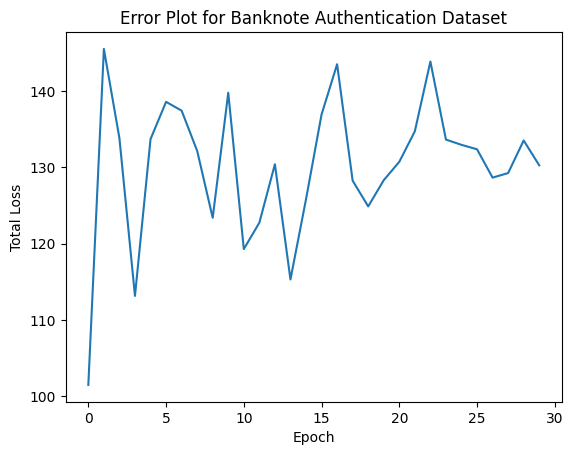

Final weights: [1.64997611 1.20372125 1.11004012 0.14058232]
Training Accuracy: 48.62%


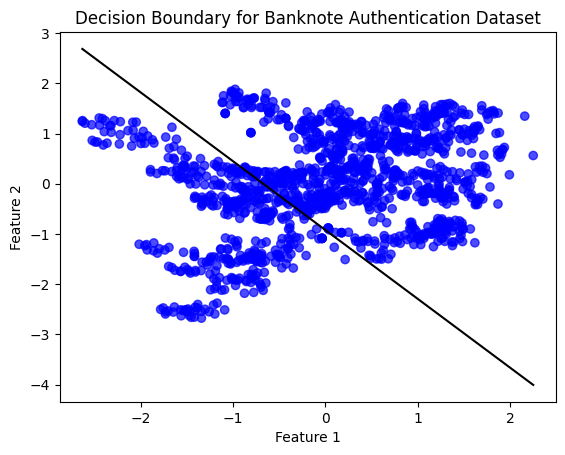

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train perceptron and visualize loss
w = perceptron_algo_plot(X_scaled, y)
plt.title("Error Plot for Banknote Authentication Dataset")
plt.show()

# Print final weights
print("Final weights:", w)

# Prediction function
def predict(X, w):
    return np.sign(np.dot(X, w))

# Make predictions on the training set
y_pred = predict(X_scaled, w)

# Calculate accuracy
accuracy = np.mean(y_pred == y)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

# Only works if X has two features
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='bwr', alpha=0.7)
x_boundary = np.linspace(min(X_scaled[:, 0]), max(X_scaled[:, 0]), 100)
y_boundary = -(w[0] * x_boundary + w[2]) / w[1]
plt.plot(x_boundary, y_boundary, color='black')
plt.title("Decision Boundary for Banknote Authentication Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



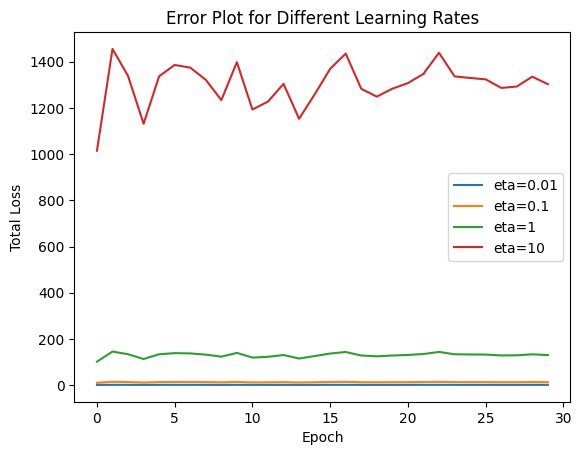

In [27]:
# Adjusting learning rate
eta_values = [0.01, 0.1, 1, 10]  # Try a small to large range

for eta in eta_values:
    def perceptron_algo_plot_adjustable(X, Y, eta):
        w = np.zeros(len(X[0]))
        n = 30
        errors = []

        for t in range(n):
            total_error = 0
            for i, x in enumerate(X):
                if (np.dot(X[i], w) * Y[i]) <= 0:
                    total_error += (np.dot(X[i], w) * Y[i])
                    w = w + eta * X[i] * Y[i]
            errors.append(total_error * -1)

        plt.plot(errors, label=f"eta={eta}")

    perceptron_algo_plot_adjustable(X_scaled, y, eta)

plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.legend()
plt.title("Error Plot for Different Learning Rates")
plt.show()


Running Perceptron on Non-Linearly Separable Data


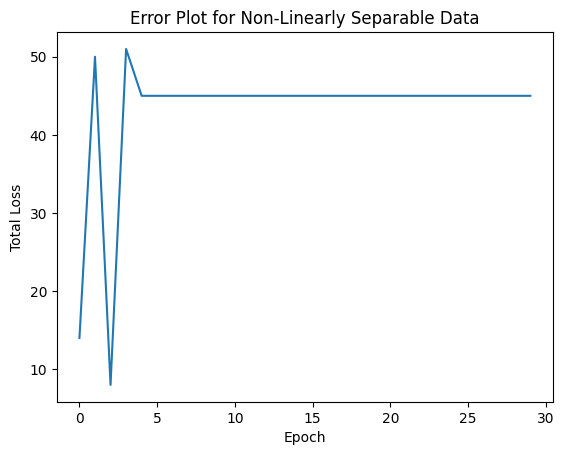

In [26]:
# Non-linearly separable toy dataset
X_non_linear = np.array([
    [1, 1, -1],
    [2, 1, -1],
    [2, 2, -1],
    [4, 4, -1],
    [4, 5, -1]
])

y_non_linear = np.array([-1, -1, 1, 1, -1])

# Train Perceptron on this dataset and observe the error plot
print("Running Perceptron on Non-Linearly Separable Data")
w_non_linear = perceptron_algo_plot(X_non_linear, y_non_linear)
plt.title("Error Plot for Non-Linearly Separable Data")
plt.show()


In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


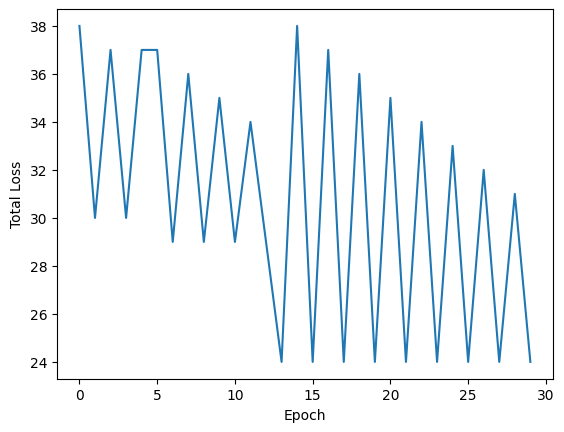

In [12]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

1. Is the dataset for the AND function learnable by a Perceptron?

Answer:
- Yes, the dataset for the AND function is learnable by a Perceptron because it is linearly separable.

- Weight Update Procedure:
Start with weights
[0,0][0,0] and bias 0. After running through the perceptron update steps, the final weights are
[1,1][1,1] with a bias of 0, which successfully separates the classes.

2. Answer: Out of 16 possible Boolean functions, 14 are learnable by a Perceptron.

Non-learnable Functions: The functions XOR and XNOR are not learnable because they are not linearly separable.

Truth Tables for Non-learnable Functions:

XOR:
- 𝑥1 𝑥2 y
- 0	0	-1
- 0	1	1
- 1	0	1
- 1	1	-1



XNOR:

- 𝑥1	𝑥2 y
- 0	0	1
- 0	1	-1
- 1	0	-1
- 1	1	1
